In [1]:
import sys
import os


%load_ext autoreload
%autoreload 2

path = os.path.abspath("../..")

print(f"Project: {path}")

%env DOES_PROJECT_DIR=$path
%env DOES_PROJECT_ID_SUFFIX=dbg

does_config_path = os.path.join(os.environ["DOES_PROJECT_DIR"], "doe-suite-config")

path = os.path.join(does_config_path, "does_etl_custom")
sys.path.append(path)


Project: /home/kuenico/dev/doe-suite/demo_project
env: DOES_PROJECT_DIR=/home/kuenico/dev/doe-suite/demo_project
env: DOES_PROJECT_ID_SUFFIX=dbg


## Developing ETL Steps

Filtering our pipelines: {'minimal_box', 'custom', 'data', 'grid'}


processing runs of experiment dummydata: 100%|██████████| 12/12 [00:00<00:00, 147.59it/s]


,system,system_config,workload,base_s_mean,base_s_std,overhead1_s_mean,overhead1_s_std,overhead2_s_mean,overhead2_s_std,base_mb_mean,base_mb_std,overhead_mb_mean,overhead_mb_std
0,system1,v1,workload1,23.68,2.782445,4.46,0.753658,10.40,1.414214,848.86,80.172271,276.24,25.121266
1,system1,v1,workload2,31.08,4.656393,6.12,1.355360,12.48,2.100476,808.10,97.760217,377.28,43.583678
2,system1,v2,workload1,125.88,95.075849,21.14,12.371661,55.76,47.476026,4441.94,3274.491054,1424.92,1004.210305
3,system1,v2,workload2,167.14,128.302233,27.80,15.061872,68.44,60.998426,4261.88,3173.190753,1953.14,1373.695484
4,system2,v1,workload1,24.02,1.495660,5.64,0.477493,11.20,0.790569,804.84,39.103938,260.18,12.388180
5,system2,v1,workload2,21.00,2.238303,3.64,0.577062,9.26,1.094532,865.54,73.985154,241.26,19.942743
6,system2,v2,workload1,124.52,91.121084,27.78,18.044999,58.26,45.447860,4146.72,2996.498723,1330.46,938.941022
7,system2,v2,workload2,111.24,83.529115,17.28,10.354806,49.66,41.632295,4515.88,3316.990253,1242.48,876.043396
8,system3,v1,workload1,29.60,5.037360,5.12,1.355360,11.42,2.189064,837.46,115.761902,367.30,48.185475
9,system3,v1,workload2,27.84,6.055411,4.08,1.477159,10.62,2.641401,888.98,160.504368,365.88,61.785613


Config=cfg={'metrics': {'time': {'value_cols': ['base_s_mean'], 'unit_label': 'sec'}}, 'cum_subplot_config': [{'chart': {'bar_foreach': {'cols': ['system', 'system_config', 'workload'], 'label': {'template': '{system}\n{system_config}\n{workload}'}}}, 'yaxis': {'label': {'template': '{$metrics$} [{$metric_unit$}]'}}, 'xaxis': {'tick_params': {'axis': 'x', 'labelsize': 7}}, 'label_map': {'system1': 's1', 'system2': 's2', 'system3': 's3', 'workload1': 'w1', 'workload2': 'w2', 'workload3': 'w3'}}]}
Filtered out 0 rows, now there are 12 remaining rows
plot_id={}
Init Subplot Grid: n_rows=1 n_cols=1

grid={(): [()]}

  subplot_id={'$metrics$': 'time', '$metric_unit$': 'sec', 'subplot_row_idx': 0, 'subplot_col_idx': 0}
    group_id={}
      bar_id={'system': 'system1', 'system_config': 'v1', 'workload': 'workload1'}
        part_id={'value_col': 'base_s_mean', 'error_col': None}
          bar_part_config={}
      bar_id={'system': 'system1', 'system_config': 'v1', 'workload': 'workload2'}
  

None

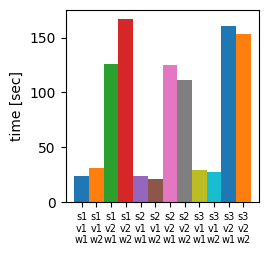

In [2]:
from doespy.etl.etl_debug import debug_compute_input_df, debug_super_etl_step
from doespy.etl.steps.colcross.colcross import ColumnCrossPlotLoader



super_etl = "demo02-colcross"
pipeline="minimal"
StepCls=ColumnCrossPlotLoader

#debug_compute_input_df.cache_clear()
df = debug_compute_input_df(super_etl=super_etl, pipeline=pipeline, StepCls=StepCls)

display(df)

res = debug_super_etl_step(super_etl=super_etl, pipeline=pipeline, StepCls=StepCls, df=df)

display(res)

## Debug JMES Path Query

Useful for **jp_except**, and **jp_query** for the ColumnCrossPlotLoader. 

In [3]:
data_id = {'host_type': 'small_v2', 'exp_name': 'triangle1', 'x': '9', 'y': '4', 'value_col': 'run', 'error_col': None}

query = "{exp_name: exp_name == 'triangle1' || exp_name == 'triangle2', x: to_number(x) > 5}"

query = "(exp_name == 'triangle1' || exp_name == 'triangle2') && to_number(x) > `5`"

import jmespath

path = jmespath.search(query, data_id)

print(path)

True
